In [2]:
import jieba
import re
import matplotlib.pyplot as plt

In [3]:
#读取文件
file = open('./news.txt','r',encoding='utf-8',errors='ignore')
page = file.read()
file.close()

[('小区', 27), ('改造', 23), ('老旧', 22), ('朝阳区', 20), ('居民', 14), ('社会', 13), ('资本', 10), ('改建', 8), ('项目', 8), ('电梯', 8), ('建委', 7), ('完工', 7), ('开工', 7)]
[0.037604456824512536, 0.03203342618384401, 0.03064066852367688, 0.027855153203342618, 0.019498607242339833, 0.018105849582172703, 0.013927576601671309, 0.011142061281337047, 0.011142061281337047, 0.011142061281337047, 0.009749303621169917, 0.009749303621169917, 0.009749303621169917]


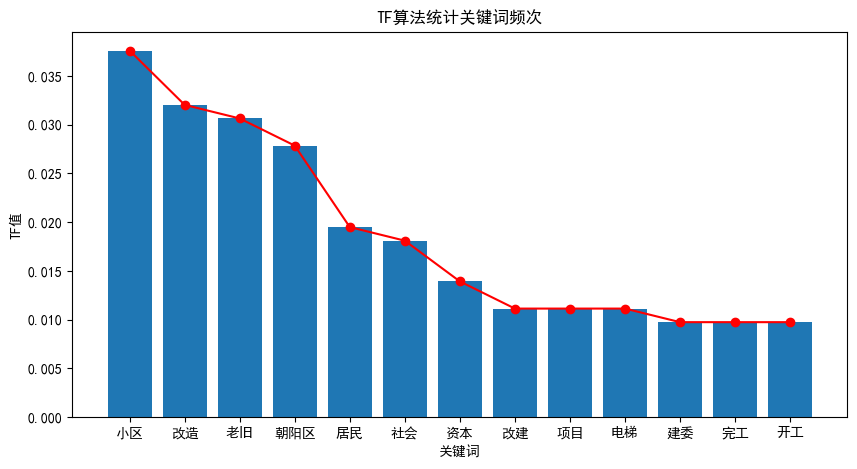

In [6]:
#使用jieba分词
seg_list = jieba.lcut(page)
#设置停用词
stop_word=['，','。','、','！','“','”','‘','’','+','—','一','了','大','的','和','这','于','在','小','以','内','让','为','将','给','由','是','也','里','外','说','等','及','上','下','多','少','另','部','到','去','前','后','左','右','年','月','日','东','南','西','北']

#将数字过滤
temp=[]
for sentence in seg_list:
   temp.append(re.findall('[0-9]{1,4}',sentence))

#将数字设置为停用词并且去重
temp=[int(x) for item in temp for x in item]
for i in temp:
   if str(i) not in stop_word:
      stop_word.append(str(i))

#得到去除停用词后的列表
seg_clr_list = [word for word in seg_list if word not in stop_word]

#计数
count=[]
for i in seg_clr_list:
   count.append(seg_clr_list.count(i))

#将word与count组合
seg_list_count=zip(seg_clr_list,count)
#降序
seg_list_count=sorted(seg_list_count,key=lambda x:x[1],reverse=True)

#将频次大于5的词打印出来
seg_sort=[]
for i in seg_list_count:
   if i not in seg_sort and int(i[1])>6:
      seg_sort.append(i)
print(seg_sort)

#计算TF值
tf=[]
word=[]
for i in seg_sort:
   word.append(str(i[0]))
   tf.append(int(i[1])/len(seg_clr_list))

#展示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(10, 5))
plt.plot(word,tf,'ro-')
plt.bar(word,tf)
plt.xlabel("关键词")
plt.ylabel("TF值")
plt.title("TF算法统计关键词频次")
plt.show()